In [1]:
import os
import sys
import inspect
import numpy as np
import torch
from torchvision import transforms
from PIL import Image

In [2]:
from torch.utils.data.dataset import Dataset

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [4]:
data_root = '/home/ubuntu/dev/LaneNet-Pytorch'
training_file = 'data/tusimple/test/test.txt'

In [5]:
class LaneNetDataset:
    def __init__(self, root, text_file, transform=None):
        # Set image size
        self.transform = transform
        self.root = root
        
        text_file = os.path.join(root, text_file)
        
        # Create a list with all image path
        # [[img, binary, instance], ...]
        self.data_locations = []
        with open(text_file, 'r') as f:
            for line in f:
                d = [a for a in line.rstrip('\n').split(' ')]
                self.data_locations.append(d)

    def __getitem__(self, index):
        '''Return 3 images (src, binary, instance)'''
        source_path, binary_path, instance_path = self.data_locations[index]
        source_path = os.path.join(self.root, source_path)
        binary_path = os.path.join(self.root, binary_path)
        instance_path = os.path.join(self.root, instance_path)
        source_img = Image.open(source_path)
        binary_img = Image.open(binary_path)
        instance_img = Image.open(instance_path)
        
        # if src_image should be transformed, then transform all other
        if self.transform:
            source_img = self.transform(source_img)
            binary_img = self.transform(binary_img)
            instance_img = self.transform(instance_img)
        else:
            source_img = np.array(source_img)
#             source_img = source_img.reshape(
#                 source_img.shape[2], source_img.shape[0], source_img.shape[1])
            binary_img = np.array(binary_img)
            instance_img = np.array(instance_img)
        
        return (source_img, binary_img, instance_img)

    def __len__(self):
        return len(self.data_locations)


In [6]:
dataset = LaneNetDataset('..', training_file)
print(len(dataset))

2782


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = dataset[0]  # first data
type(data[0])
type(data[1])
type(data[2])
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)

(720, 1280, 3)
(720, 1280)
(720, 1280)


(720, 1280, 3)


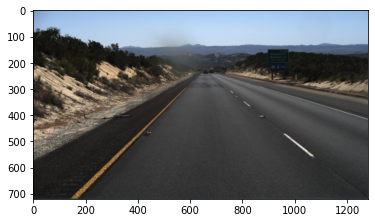

In [9]:
plt.imshow(data[0])
print(data[0].shape)

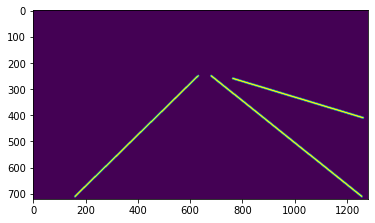

In [10]:
# Binary segmentation
plt.imshow(data[1])

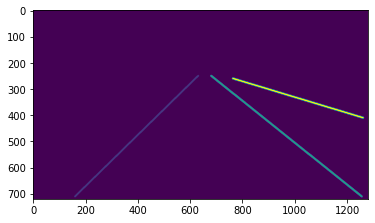

In [11]:
# Instance segmentation
plt.imshow(data[2])

In [12]:
from LaneNet import build_transforms

In [16]:
transform, _ = build_transforms(height=256, width=512)

Building train transforms ...
+ resize to 256x512
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x512
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [17]:

dataset = LaneNetDataset('..', training_file,  transform)
print(len(dataset))

2782


In [18]:
data = dataset[0]  # first data

RuntimeError: output with shape [1, 256, 512] doesn't match the broadcast shape [3, 256, 512]

In [14]:
data[2]

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])

In [15]:
import torchvision.transforms.functional as VF

In [16]:
binary = VF.to_pil_image(data[1])

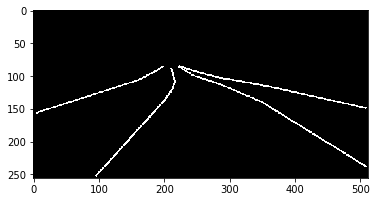

In [17]:
plt.imshow(binary)

In [18]:
instance = VF.to_pil_image(data[2])

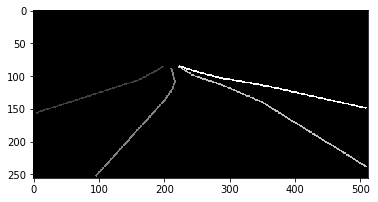

In [19]:
plt.imshow(instance)

In [20]:
src = VF.to_pil_image(dataset.rgb_normalize(data[0]))

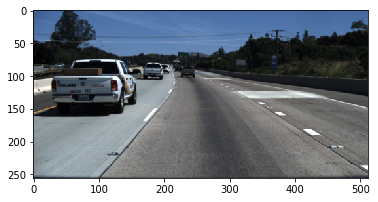

In [21]:
plt.imshow(src)